# 1. Data Exploration

In [53]:
import pandas as pd

train_data = pd.read_csv('../data/train.csv')
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [54]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

print(f"{round(rate_women * 100, 2)}% of women survived")

74.2% of women survived


In [56]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

print(f"{round(rate_men * 100, 2)}% of men survived")

18.89% of men survived


In [57]:
men_class1 = train_data.loc[(train_data.Sex == 'male') & (train_data.Pclass == 1)]["Survived"]
men_class2 = train_data.loc[(train_data.Sex == 'male') & (train_data.Pclass == 2)]["Survived"]
men_class3 = train_data.loc[(train_data.Sex == 'male') & (train_data.Pclass == 3)]["Survived"]

rate_men_class1 = sum(men_class1) / len(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 1)])
rate_men_class2 = sum(men_class2) / len(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 1)])
rate_men_class3 = sum(men_class3) / len(train_data.loc[(train_data.Sex == 'male') & (train_data.Survived == 1)])

print(f"{round(rate_men_class1 * 100, 2)}% of 1-class men survived")
print(f"{round(rate_men_class2 * 100, 2)}% of 2-class men survived")
print(f"{round(rate_men_class3 * 100, 2)}% of 3-class men survived")

41.28% of 1-class men survived
15.6% of 2-class men survived
43.12% of 3-class men survived


In [58]:
women_class1 = train_data.loc[(train_data.Sex == 'female') & (train_data.Pclass == 1)]["Survived"]
women_class2 = train_data.loc[(train_data.Sex == 'female') & (train_data.Pclass == 2)]["Survived"]
women_class3 = train_data.loc[(train_data.Sex == 'female') & (train_data.Pclass == 3)]["Survived"]

rate_women_class1 = sum(women_class1) / len(train_data.loc[(train_data.Sex == 'female') & (train_data.Survived == 1)])
rate_women_class2 = sum(women_class2) / len(train_data.loc[(train_data.Sex == 'female') & (train_data.Survived == 1)])
rate_women_class3 = sum(women_class3) / len(train_data.loc[(train_data.Sex == 'female') & (train_data.Survived == 1)])

print(f"{round(rate_women_class1 * 100, 2)}% of 1-class women survived")
print(f"{round(rate_women_class2 * 100, 2)}% of 2-class women survived")
print(f"{round(rate_women_class3 * 100, 2)}% of 3-class women survived")

39.06% of 1-class women survived
30.04% of 2-class women survived
30.9% of 3-class women survived


In [59]:
fare_men = train_data.loc[(train_data.Sex == 'male') & (train_data.Fare >= train_data.Fare.median())]["Survived"]
rate_fare_men = sum(fare_men) / len(fare_men)

print(f"{round(rate_fare_men * 100, 2)}% of higher-paid men survived")

28.93% of higher-paid men survived


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_7941/1761437797.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


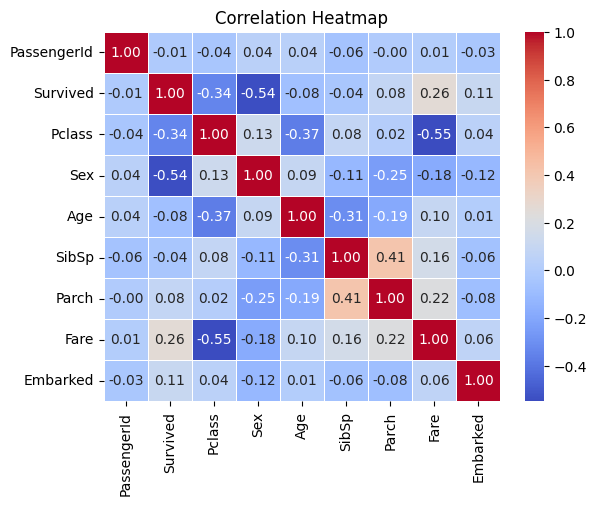

In [61]:
train_data["Sex"] = train_data["Sex"].map({'male': 1, 'female': 0})
train_data["Embarked"] = train_data["Embarked"].map({'S': 1, 'C': 2, 'Q': 3})

corr_matrix = train_data.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [75]:
columns_to_drop = ["PassengerId", "Age", "SibSp", "Parch", "Name", "Cabin", "Ticket", "Embarked"]
clean_data = train_data.drop(columns=columns_to_drop)

clean_data.head()

Survived  Pclass  Sex     Fare
0         0       3    1   7.2500
1         1       1    0  71.2833
2         1       3    0   7.9250
3         1       1    0  53.1000
4         0       3    1   8.0500

# 2. Training Model

In [76]:
from sklearn.model_selection import train_test_split

X = clean_data.drop(columns=["Survived"])
y = clean_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
[[91 14]
 [19 55]]


# 3. Preparing Submission File

In [88]:
test_data = pd.read_csv('../data/test.csv')

test_data["Sex"] = test_data["Sex"].map({
    'male': 1,
    'female': 0
})

passenger_ids = test_data["PassengerId"]

test_data.drop(columns=columns_to_drop, inplace=True)

test_data.head()

Pclass  Sex     Fare
0       3    1   7.8292
1       3    0   7.0000
2       2    1   9.6875
3       3    1   8.6625
4       3    0  12.2875

In [89]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

predictions = model.predict(test_data_imputed)

submission_df = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": predictions
})

submission_df.to_csv("../results/submission.csv", index=False)